In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error as mse
# import seaborn as sns

In [0]:
def path(x0,y0,theta,R,l) :
    eps = .5 
    if (abs(theta) < eps) :
        y = y0 + l
        x = x0
    else :
        y = y0 + R*np.sin(theta)
        x = x0 + R*(1-np.cos(theta))
    return x ,y
            

In [0]:
def rot(cum_theta) :
#     cum_theta = cum_theta*np.pi/180
    rat_mat =[[np.cos(cum_theta), np.sin(cum_theta)],[-np.sin(cum_theta), np.cos(cum_theta)]]
    return rat_mat
    

In [0]:
def R_th(roll,dis) :
    R = .2/np.tan(roll*np.pi/180)
    theta = dis/R
    return R, theta 

In [0]:
def prepare(df) :
    p_first = df.loc[0,'motor_position']
    index_p = sum(p_first == df['motor_position'])
    
    clean_data = df.loc[index_p-1:]
    clean_data = clean_data[clean_data.motor_speed > 0]
    clean_data = clean_data.reset_index()
    clean_data = clean_data.loc[0:]
    n_row = clean_data.shape[0]
    clean_data.loc[0,'dis'] = 0
    for i in range(n_row - 1) :
        clean_data.loc[i+1,'dis'] = (clean_data.loc[i+1,'motor_position'] - clean_data.loc[i,'motor_position'])
    clean_data['R'] = .2/(np.tan(clean_data['roll']*np.pi/180))
    clean_data['theta'] = clean_data['dis']/clean_data['R']
    clean_data.loc[0,'theta_total'] = 0
    for i in range(n_row - 1) :
        clean_data.loc[i+1,'theta_total'] = clean_data.loc[i+1,'theta'] + clean_data.loc[i,'theta_total'] 
    clean_data.loc[0,'x'] = 0 
    clean_data.loc[0,'y'] = 0 
    x0 = 0 
    y0 = 0
    for i in range(n_row - 1) :
    # for i in range(6) :
        theta = clean_data.loc[i+1,'theta']
        if i > 1 :
            cum_th = clean_data.loc[i-1,'theta_total']
        else :
            cum_th = 0
#         cum_th = clean_data.loc[i,'theta_total']
        rat_mat = rot(cum_th)
        R = clean_data.loc[i+1,'R']
    #     s_l = R*np.sign(clean_data.loc[i+1,'motor position'])
        [x,y] = np.matmul(rat_mat, R*np.array([[(1-np.cos(theta))],[np.sin(theta)]]))
#         x,y = np.matmul(rat_mat, R*np.array([[(1-np.cos(theta*np.pi/180))],[np.sin(theta*np.pi/180)]]))
    #     print(x0,y0)
    #     print('R=', R)
#         print('cum',cum_th)
    #     print('matrix = ',rat_mat)
    #     print(x,y)
        clean_data.loc[i+1,'x'] = x +clean_data.loc[i,'x']
        clean_data.loc[i+1,'y'] = y +clean_data.loc[i,'y']
    #     x0 += x 
    #     y0 += y
#     clean_data = clean_data.dropna(how = 'any')
    
    return clean_data

In [0]:
# set path 
path = 'data/circle/'
file = 'circle_mod.txt'
# preparing data 
df2 = pd.read_csv(path+file)
clean_datac = prepare(df2)

In [0]:
# set plot style 
from matplotlib import style
plt.style.use('default')

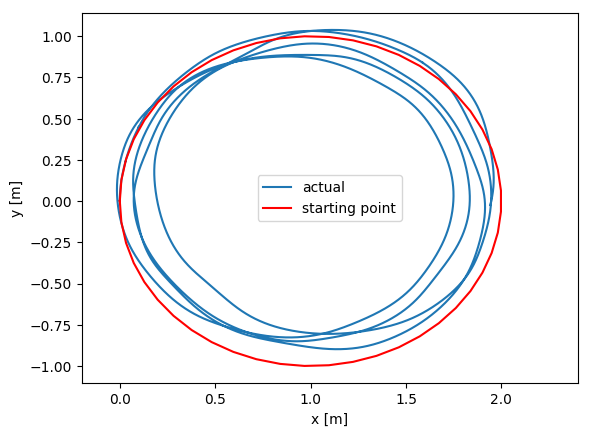

In [0]:
# plot x and y
plt.plot(clean_datac['x'],clean_datac['y'])
# plt.plot(sample['x'],sample['y'],'-',markersize = 2)
# plt.plot(sample['x'],sample['y'],'x-')
# l = -3.83048772171245
# L = np.linspace(0., l,num=100)
# R = 2.17534264967002
theta = np.linspace(0., 2*np.pi)
R = 1
X = R*(1-np.cos(theta))
Y =  0 + R*np.sin(theta)
plt.plot(X,Y,'r')
# plt.plot([0]*100,L,'r')
plt.xlim((-.2,2.4))
# plt.ylim((-1,2))
# plt.xlim((-1.5,.2))

# plt.plot(cc.x,cc.y,'x-')
# plt.axvline(x=0, color='r', linestyle='--')
# plt.plot([0,0],'x',color = 'gold')
# plt.plot([-.5,3],'x')
# plt.plot(0,0,'x',color = 'yellow')
# plt.plot(1,-2,'x',color = 'gold')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
# plt.legend(['actual','design','design','starting point','end point'])
plt.legend(['actual','starting point'])
# plt.title('statics')
plt.show()

In [0]:
clean_data['error'] = np.sqrt((clean_data.x-1)**2 + (clean_data.y)**2 -1)

/Users/pudit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [0]:
clean_data.error.mean()

0.09911658907774158

In [0]:
path = 'data/linear/'
file = 'D4.txt'

df = pd.read_csv(path+file)
# df2.motor_position = df2.motor_position*3
clean_data = prepare(df)

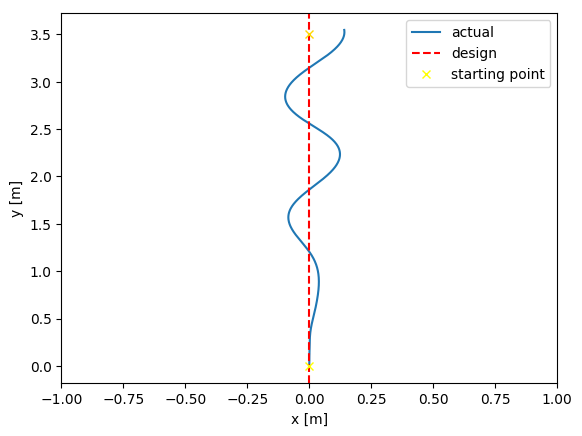

In [0]:
plt.plot(clean_data['x'],clean_data['y'])
# plt.plot(sample['x'],sample['y'],'-',markersize = 2)
# plt.plot(sample['x'],sample['y'],'x-')
# l = -3.83048772171245
# L = np.linspace(0., l,num=100)
# R = 2.17534264967002
# theta = np.linspace(0., 1)
# R = .8
# X = R*(1-np.cos(theta))
# Y =  l + R*np.sin(theta)
# plt.plot(X,Y,'r')
# plt.plot([0]*100,L,'r')
# plt.xlim((-.2,1.5))
# plt.ylim((-1,2))
plt.xlim((-1,1))

# plt.plot(cc.x,cc.y,'x-')
plt.axvline(x=0, color='r', linestyle='--')
# plt.plot([0,0],'x',color = 'gold')
# plt.plot([-.5,3],'x')
plt.plot(0,0,'x',color = 'yellow')
plt.plot(0,3.5,'x',color = 'gold')
# plt.plot(1,-2,'x',color = 'gold')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
# plt.legend(['actual','design','design','starting point','end point'])
plt.legend(['actual','design','starting point'])
# plt.title('statics')
plt.show()


กระดาษทด


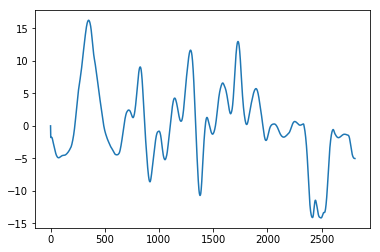

In [0]:
plt.plot(clean_data['roll_total'])

In [0]:
import math
def rot(theta,R) :
    theta = theta*math.pi/180 
    rotz = np.array([[math.cos(-theta),-math.sin(-theta),0,R*math.sin(theta)],[math.sin(-theta),math.cos(-theta),0,R*(1-math.cos(theta))]
           ,[0,0,1,0],[0,0,0,1]])
    return rotz

In [0]:
rot(30,2)

array([[ 0.8660254 ,  0.5       ,  0.        ,  1.        ],
       [-0.5       ,  0.8660254 ,  0.        ,  0.26794919],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [0]:
rot(0.01,1000000000)

array([[ 9.99999985e-01,  1.74532924e-04,  0.00000000e+00,
         1.74532924e+05],
       [-1.74532924e-04,  9.99999985e-01,  0.00000000e+00,
         1.52308709e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Text(0.5, 1.0, 'statics')

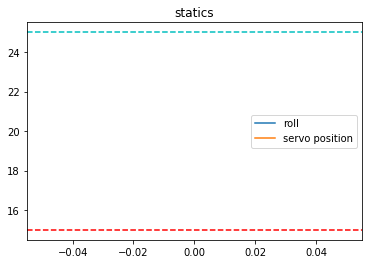

In [0]:
rise = df.loc[40:index_p]
plt.plot(rise['roll'])
plt.plot(rise['servo position'])
plt.axhline(y=15, color='r', linestyle='--')
plt.axhline(y=25, color='c', linestyle='--')
plt.legend(['roll','servo position'])
plt.title('statics')

Text(0.5, 1.0, 'after rotating')

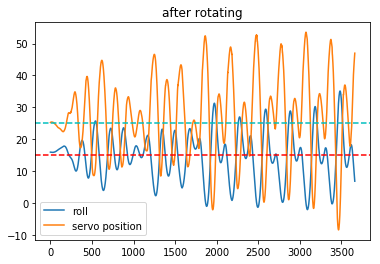

In [0]:
af_rise = df.loc[index_p:4000].reset_index()
plt.plot(af_rise['roll'])
plt.plot(af_rise['servo position'])
plt.axhline(y=15, color='r', linestyle='--')
plt.axhline(y=25, color='c', linestyle='--')
plt.legend(['roll','servo position'])
plt.title('after rotating')

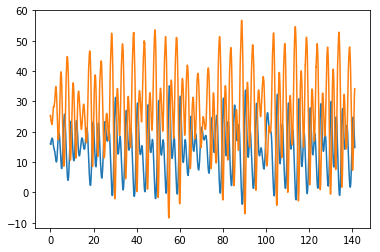

In [0]:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# plt.scatter(clean_data['motor position'],clean_data['roll'],alpha = '1',c='r',label = 'p_motor')
# plt.scatter(clean_data['motor position'],clean_data['servo position'], alpha = '1')
plt.plot(clean_data['motor position'],clean_data['roll'],marker = '.',markersize=.02)
plt.plot(clean_data['motor position'],clean_data['servo position'])

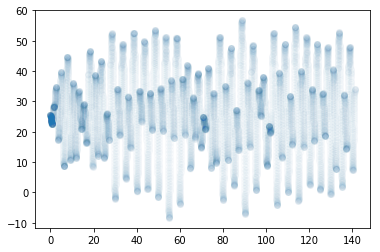

In [0]:
plt.scatter(clean_data['motor position'],clean_data['servo position'], alpha = '.02')

In [0]:
clean_data.corr()

,index,motor position,roll,servo position
index,1.000000,0.999989,0.004742,-0.004215
motor position,0.999989,1.000000,0.004607,-0.004229
roll,0.004742,0.004607,1.000000,-0.823987
servo position,-0.004215,-0.004229,-0.823987,1.000000


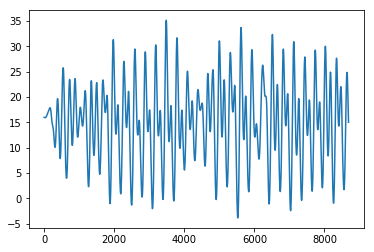

In [0]:
theta_servo = 25
theta_roll = 15
clean_data['abs_roll'] = clean_data['roll'] - theta_roll
clean_data['abs_servo'] = clean_data['servo position'] - theta_servo
clean_data['abs_diff'] = clean_data['abs_roll'] + clean_data['abs_servo']
plt.plot(clean_data.loc[::2,['roll']])

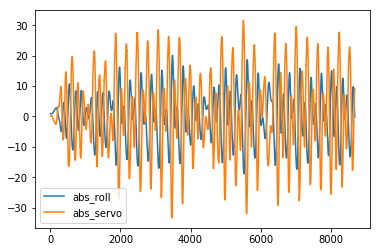

In [0]:
plt.plot(clean_data['abs_roll'])
plt.plot(clean_data['abs_servo'])
# plt.plot(clean_data['abs_diff'])
plt.legend(['abs_roll','abs_servo'])
plt.show()

In [0]:
clean_data.describe()

,index,motor position,roll,servo position,abs_roll,abs_servo,abs_diff
count,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000
mean,4682.500000,69.449126,15.043211,26.445415,0.043211,1.445415,1.488626
std,2508.731253,41.440572,7.917985,13.561745,7.917985,13.561745,8.345845
min,338.000000,-0.014914,-3.896651,-8.413304,-18.896651,-33.413304,-20.998550
25%,2510.250000,33.526069,9.862186,17.351164,-5.137814,-7.648836,-4.127862
50%,4682.500000,69.475735,15.529070,26.415618,0.529070,1.415618,1.834582
75%,6854.750000,105.374942,20.241907,35.964573,5.241907,10.964573,8.333091
max,9027.000000,141.258655,35.126855,56.712734,20.126855,31.712734,16.914400


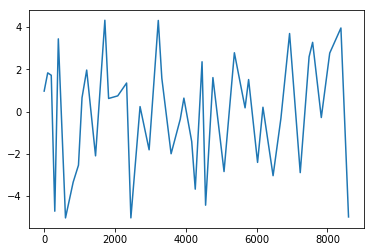

In [0]:
cut_data = clean_data[(clean_data['abs_roll'] < 5.241907) & (clean_data['abs_roll'] > -5.137814)]
plt.plot(cut_data.loc[::100,['abs_roll']])

(array([274., 708., 676., 515.,   0.,   0., 921., 676., 469., 107.]),
 array([-18.896651 , -14.9943004, -11.0919498,  -7.1895992,  -3.2872486,
          0.615102 ,   4.5174526,   8.4198032,  12.3221538,  16.2245044,
         20.126855 ]),
 <a list of 10 Patch objects>)

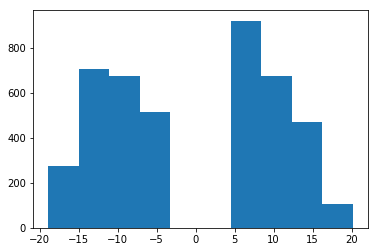

In [0]:
cutoff_data = clean_data[(clean_data['abs_roll'] < -5.137814) | (clean_data['abs_roll'] > 5.24190)]
cutoff_data
plt.hist(cutoff_data['abs_roll'])

In [0]:
np.sqrt(mse(clean_data.abs_diff,clean_data.abs_roll))

13.637778446292254

/Users/pudit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/pudit/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


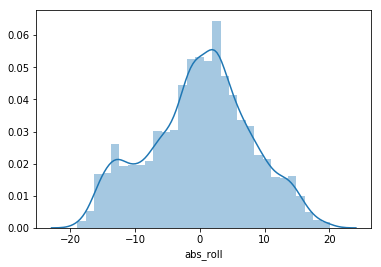

In [0]:
sns.distplot(clean_data['abs_roll'],bins = 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1298e3898>,
 'caps': [<matplotlib.lines.Line2D at 0x1298e3e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1298e30b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1298e3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1314d25f8>],
 'means': []}

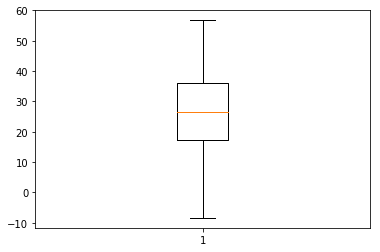

In [0]:
plt.boxplot(clean_data['servo position'])

In [0]:
8000/50

160.0